# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [1]:
import pandas as pd

## imports for Python, Pandas

In [2]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [3]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [4]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [5]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,state,shortname,info.governor
0,Dade,12345,Florida,FL,Rick Scott
1,Broward,40000,Florida,FL,Rick Scott
2,Palm Beach,60000,Florida,FL,Rick Scott
3,Summit,1234,Ohio,OH,John Kasich
4,Cuyahoga,1337,Ohio,OH,John Kasich


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [6]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{'_id': {'$oid': '52b213b38594d8a2be17c780'},
  'approvalfy': 1999,
  'board_approval_month': 'November',
  'boardapprovaldate': '2013-11-12T00:00:00Z',
  'borrower': 'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  'closingdate': '2018-07-07T00:00:00Z',
  'country_namecode': 'Federal Democratic Republic of Ethiopia!$!ET',
  'countrycode': 'ET',
  'countryname': 'Federal Democratic Republic of Ethiopia',
  'countryshortname': 'Ethiopia',
  'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  'envassesmentcategorycode': 'C',
  'grantamt': 0,
  'ibrdcommamt': 0,
  'id': 'P129828',
  'idacommamt': 130000000,
  'impagency': 'MINISTRY OF EDUCATION',
  'lendinginstr': 'Investment Project Financing',
  'lendinginstrtype': 'IN',
  'lendprojectcost': 550000000,
  'majorsector_percent': [{'Name': 'Education', 'Percent': 46},
   {'Name': 'Education', 'Percent': 26},
   {'Name': 'Public Administration, Law, and Justice', 'Percent': 16},
   {'Name': 'Educatio

In [7]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Name': 'Education for all', 'Percent': 100}","[{'name': 'Education for all', 'code': '65'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Name': 'Other economic management', 'Percent...","[{'name': 'Other economic management', 'code':...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

<b> Get data </b>

In [8]:
with open('data/world_bank_projects.json', 'r') as json_file:
    json_data = json.load(json_file)

In [9]:
# Load as Pandas dataframe
df = pd.read_json('data/world_bank_projects.json')

&nbsp;



<b> 1. Find the 10 countries with most projects </b>

In [10]:
# Look at columns and number of entries
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 50 columns):
_id                         500 non-null object
approvalfy                  500 non-null int64
board_approval_month        500 non-null object
boardapprovaldate           500 non-null object
borrower                    485 non-null object
closingdate                 370 non-null object
country_namecode            500 non-null object
countrycode                 500 non-null object
countryname                 500 non-null object
countryshortname            500 non-null object
docty                       446 non-null object
envassesmentcategorycode    430 non-null object
grantamt                    500 non-null int64
ibrdcommamt                 500 non-null int64
id                          500 non-null object
idacommamt                  500 non-null int64
impagency                   472 non-null object
lendinginstr                495 non-null object
lendinginstrtype            495 non

In [11]:
# Top 10 countries with most projects
df['countryname'].value_counts().head(15)

People's Republic of China         19
Republic of Indonesia              19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
Kingdom of Morocco                 12
Nepal                              12
People's Republic of Bangladesh    12
Africa                             11
Republic of Mozambique             11
Islamic Republic of Pakistan        9
Burkina Faso                        9
Federative Republic of Brazil       9
Republic of Armenia                 8
Republic of Tajikistan              8
Name: countryname, dtype: int64

In [12]:
# Check countrycode results to see if it matches
df['countrycode'].value_counts().head(15)

ID    19
CN    19
VN    17
IN    16
RY    13
NP    12
BD    12
MA    12
3A    11
MZ    11
BF     9
BR     9
PK     9
TJ     8
TZ     8
Name: countrycode, dtype: int64

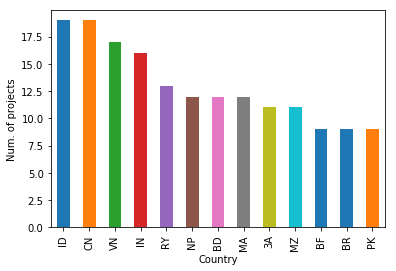

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

# Make bar plot of top 10 countries
df['countrycode'].value_counts().head(13).plot.bar()
plt.xlabel('Country')
plt.ylabel('Num. of projects')
plt.show()

&nbsp;

Top 10 countries with most projects are China, Indonesia, Vietnam, India, Yemen, Nepal, Morocco, Bangladesh, Mozambique, and with equal numbers of projects in 10th place are Pakistan, Burkina Faso, and Brazil. "Africa" has the same number of projects as Mozambique but according to the World Bank references, refers to a region in western Africa, not a specific country.

&nbsp;


&nbsp;



<b> 2. Find the top 10 major project themes (using column 'mjtheme_namecode') </b>

In [16]:
# Check out mjtheme_namecode entry
df['mjtheme_namecode'][0]

[{'code': '8', 'name': 'Human development'}, {'code': '11', 'name': ''}]

In [17]:
df['mjtheme_namecode'][2]

[{'code': '5', 'name': 'Trade and integration'},
 {'code': '2', 'name': 'Public sector governance'},
 {'code': '11', 'name': 'Environment and natural resources management'},
 {'code': '6', 'name': 'Social protection and risk management'}]

In [18]:
from collections import Counter

In [19]:
total = Counter()

In [20]:
# Each entry in 'mjtheme_namecode' contains lists of dictionaries
col_name = 'mjtheme_namecode'

# Iterate over each row and count value for each code; keep a running total
for index, row in df.iterrows():    
    total += Counter(x['code'] for x in row[col_name])    

In [21]:
# Top 10 major project themes by code
total.most_common(10)

[('11', 250),
 ('10', 216),
 ('8', 210),
 ('2', 199),
 ('6', 168),
 ('4', 146),
 ('7', 130),
 ('5', 77),
 ('9', 50),
 ('1', 38)]

In [22]:
# Double check to see how many codes there are
len(total)

11

In [23]:
# Match the codes to the names of the project themes
# Create a dictionary with keys and empty values

dict_codes = dict.fromkeys(['%1d' %i for i in range(1,12)])
dict_codes

{'1': None,
 '2': None,
 '3': None,
 '4': None,
 '5': None,
 '6': None,
 '7': None,
 '8': None,
 '9': None,
 '10': None,
 '11': None}

In [24]:
# Loop through dataframe rows to get the names, as long as any of the keys in dict_codes is empty

while any([v==None for v in dict_codes.values()]):    # Check for empty values
    for index, row in df.iterrows():    # Iterate through dataframe rows
        for i in range(0,len(row[col_name])):    # Go through each dictionary in the list
            if len(row[col_name][i].get('name')) > 0:    # Check that name is not empty
                dict_codes[row[col_name][i].get('code')] = row[col_name][i].get('name')    # Fill in name into dictionary

In [25]:
# Dictionary of codes and names
dict_codes

{'1': 'Economic management',
 '2': 'Public sector governance',
 '3': 'Rule of law',
 '4': 'Financial and private sector development',
 '5': 'Trade and integration',
 '6': 'Social protection and risk management',
 '7': 'Social dev/gender/inclusion',
 '8': 'Human development',
 '9': 'Urban development',
 '10': 'Rural development',
 '11': 'Environment and natural resources management'}

In [26]:
# Top 10 major project themes by code and name
{x[0]:dict_codes.get(x[0]) for x in total.most_common(10)}

{'11': 'Environment and natural resources management',
 '10': 'Rural development',
 '8': 'Human development',
 '2': 'Public sector governance',
 '6': 'Social protection and risk management',
 '4': 'Financial and private sector development',
 '7': 'Social dev/gender/inclusion',
 '5': 'Trade and integration',
 '9': 'Urban development',
 '1': 'Economic management'}

Text(0, 0.5, 'Frequency')

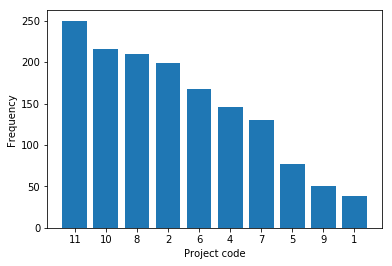

In [27]:
# Unpack total.most_common(10) list of tuples and plot

x = [x[0] for x in total.most_common(10)]
y = [y[1] for y in total.most_common(10)]
plt.bar(x, y)
plt.xlabel('Project code')
plt.ylabel('Frequency')

&nbsp;



<b> 3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in. </b>

In [28]:
df[col_name][0]

[{'code': '8', 'name': 'Human development'}, {'code': '11', 'name': ''}]

In [29]:
# Since we don't know where the empty values are, need to loop through entire dataframe

for index, row in df.iterrows():    # Iterate through dataframe rows
    for i in range(0,len(row[col_name])):    # Go through each dictionary in the list
        if len(row[col_name][i]['name']) == 0:    # Check that name is empty
                row[col_name][i]['name'] = dict_codes[row[col_name][i]['code']]      # Fill in name from dictionary

In [30]:
# Check that previously empty name was filled in
df[col_name][0]

[{'code': '8', 'name': 'Human development'},
 {'code': '11', 'name': 'Environment and natural resources management'}]

&nbsp;

Dataframe now has missing names filled in.